# Анализ данных интернет магазина компьютерных игр

Нам предоставлены данные до 2016 года интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель:** Выявить определяющие успешность игры закономерности. 

**Описание данных**

Данные за 2016 год могут быть неполными. Датасет состоит из столбцов:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы:**

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

### Загрузка данных

In [2]:
data = pd.read_csv('C:/FATHER/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** В данных 11 столбцов и 16715 строчек. В некоторых столбцах присутствуют пропуски, в некоторых неверный тип данных. Также стоит переименовать столбцы.

### Предобработка данных

#### Переименование столбцов

Приведем названия столбцов к нижнему регистру.

In [5]:
data.columns = data.columns.str.lower()

Проверим, что столбцы переименовались

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработка пропусков

Посмотрим в каких столбцах пропущены значения.

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в столбцах `name` и `year_of_release` могут быть вызваны техническим сбоем или ошибкой в работе человека, заполнявшего данные. Перед тем, как принимать решение о способе обработки пропусков, посмотрим на эти строчки.

In [8]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две игры с пропущенными названиями были выпущены в 1993 году и имели небольшие продажи. В нашем исследовании эти данные не сильно пригодяться, можем их удалять.

In [9]:
# Узнаем размер исходного датафрейма, чтобы было легче понять нужное ли количество данных мы удалили
data.shape

(16715, 11)

In [10]:
data.dropna(subset=['name'], inplace=True)

In [11]:
data.shape

(16713, 11)

In [12]:
data.loc[data['year_of_release'].isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


В своем исследовании нам очень важно знать год выпуска игры, так как мы будем анализировать данные за определенный период. Восстановить данные не получится, потому что год выпуска не зависит от других параметров. Игры с пропусками в столбце года не имели больших продаж. Удалим эти 269 строчек.

In [13]:
data.dropna(subset=['year_of_release'], inplace=True)

In [14]:
data.shape

(16444, 11)

Удалилось нужное количество данных.

Пропуски в столбцах `critic_score` и `user_score` могут быть обусловлены тем, что на ресурсе, откуда брали данные об оценках, некоторые игры могли быть не оценены. Существует множество непопулярных игр, которые никто еще не оценивал.

Пропуски в столбцах `critic_score`, `user_score` оставим. Оценки субъективны и найти зависимость вряд ли получится.

Посмотри на строчки с пропусками в столбце `rating`, а точнее на платформы, на которых выпускались игры.

In [15]:
data[data['rating'].isna()].groupby(data['platform'])['name'].count().sort_values(ascending = False)

platform
PS      986
DS      866
PS2     671
PSP     657
PS3     371
N64     316
Wii     309
GBA     297
3DS     289
PSV     279
SNES    239
X360    202
PC      200
SAT     173
PS4     137
2600    116
NES      98
GB       97
XB       89
GC       85
XOne     61
WiiU     42
DC       38
GEN      27
NG       12
SCD       6
WS        6
3DO       3
TG16      2
PCFX      1
GG        1
Name: name, dtype: int64

Большинство платформ, на которых были выпущены игры с пропусками в столбце `rating`, японского производства. Поэтому пропуски в столбце рейтинга ESRB объясняются тем, что ESRB - это американское рейтинговое агенство и оно не определяло рейтинги для японских игр.

Заменим все пропуски в столбце `rating` на значение "not specified"(не указано), чтобы в последующем провести корректный анализ и не потерять данные.

In [16]:
data.loc[data['rating'].isna(), 'rating'] = 'not specified'

Проверим, что не осталось ненужных пропусков.

In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

#### Изменение типов данных

Заметим что год выпуска записан в данных дробным числом. Изменим на целочисленный тип данных.

In [18]:
data = data.astype({'year_of_release': 'int64'} )

Столбец `user_score` имеет тип данных `object`, хотя в этом столбце записаны числа. Изменим на `float64`. Но перед этим проверим только ли числа записаны в этом столбце.

In [19]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце есть значение `tbd`. TBD - это аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Вероятно эту игру оценило слишком мало пользователей, либо она не оценена вообще. Придется обозначить `tbd` пропущенными значениями.

In [20]:
data.loc[data['user_score']=='tbd', 'user_score'] = None

In [21]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [22]:
data = data.astype({'user_score': 'float64'} )

Проверим изменились ли типы данных.

In [23]:
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

#### Обработка дубликатов

Проверим есть ли в данных дубликаты.

In [24]:
data.duplicated().sum()

0

Явных дубликатов нет. Посмотрим на повторяющиеся значения по столбцам `name` и `platform`.

In [25]:
data[data.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Мы видим три дубликата по платформе и названию игры. Строчки 604 и 16230 отличаются только числом продаж. Возможно в таблице есть устаревшие данные. Удалим строчку с меньшим числом продаж. Оставшиеся дубликаты Название-Платформа отличаются годом выпуска. Оставим их и будем считать за отдельные игры, потому что в разные года они продавались по-разному.

In [26]:
data = data.drop(index=16230).reset_index(drop=True)

In [27]:
data.shape

(16443, 11)

#### Добавление нового столбца

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not specified,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not specified,31.38


#### Вывод

1. Мы привели названия столбцов к общему виду в нижнем регистре.
2. Удалили пропуски в столбцах `name` и `year_of_release`, так как у нас не досточно информации чтобы их заполнить. В столбцах `critic_score` и `user_score` заполнить пропуски корректными данными тоже нельзя, однако мы не можем их удалить: строчеки с пропусками в этих столбцах составляют примерно 50% от всего датасета. В столбце `rating` заполнили пропуски специальным значением "not specified"
3. Изменили типы данных там, где это было необходимо.
4. Проверили данные на наличие дубликатов. 
5. Добавили столбец с суммой продаж во всех регионах.

### Исследовательский анализ данных

#### Игр за каждый год
Посмотрим сколько игр выпускалось в каждом году. Но перед этим проверим нет ли одинаковых игр, которые выпускались в одном году на нескольких платформах. Если такие есть, удалим их.

In [29]:
data.duplicated(subset=['name','year_of_release']).sum()

4248

In [30]:
data_uniq_games = data.drop_duplicates(subset=['name','year_of_release'], keep='first').reset_index(drop=True)

In [31]:
data_uniq_games.shape

(12195, 12)

In [32]:
count_games = data_uniq_games.groupby('year_of_release')['name'].count()
count_games

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      59
1994     117
1995     215
1996     258
1997     282
1998     364
1999     326
2000     325
2001     428
2002     631
2003     546
2004     550
2005     657
2006     773
2007     884
2008    1039
2009    1001
2010     900
2011     779
2012     446
2013     335
2014     319
2015     362
2016     297
Name: name, dtype: int64

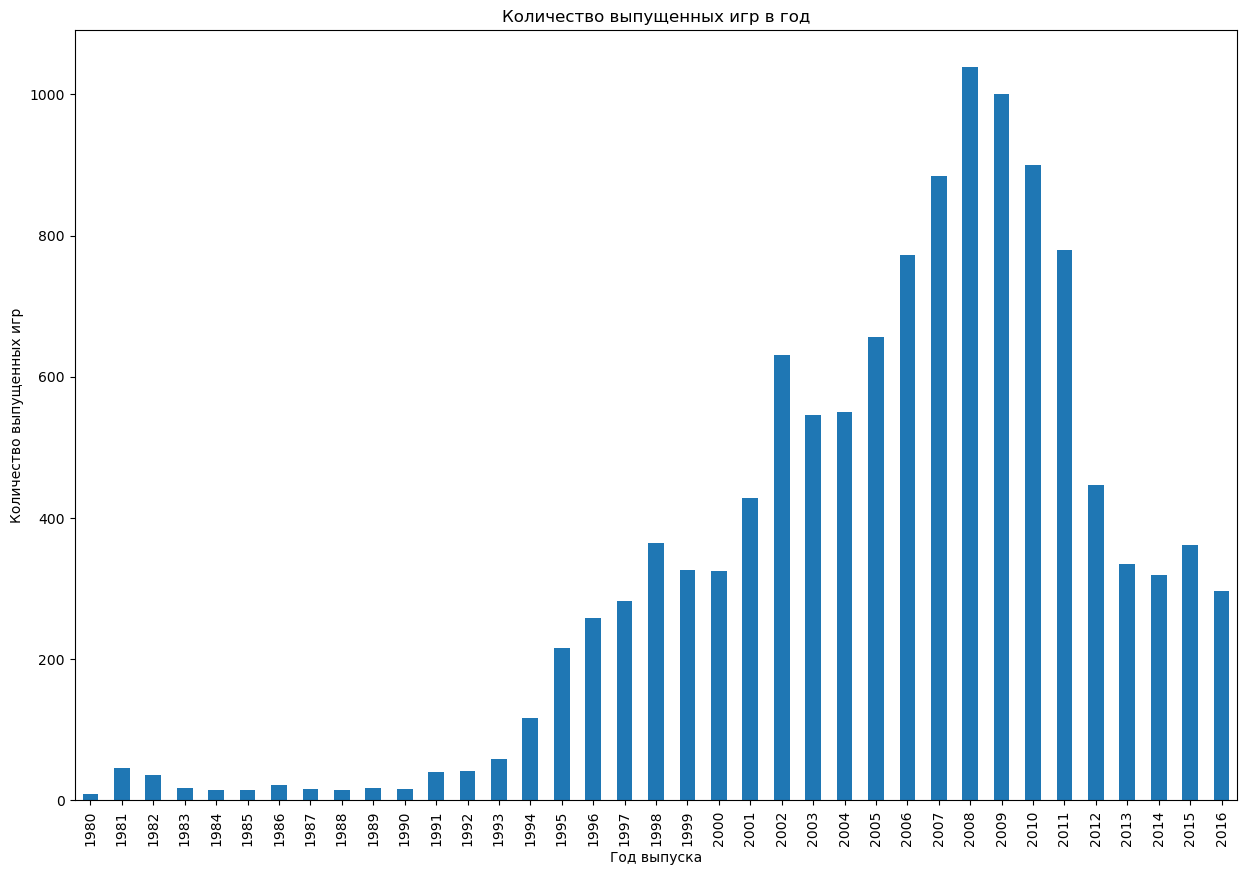

In [33]:
count_games.plot(kind='bar', figsize = (15,10))
plt.title('Количество выпущенных игр в год')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр');

Больше всего игр выпускалось после 2000 года. Игры, выпущенные до, составляют незначительную часть от всех данных. Пик по количеству выпущеных игр был в 2008 году.

#### Продажи по платформам

##### Продажи по платформам за всё время
Посмотрим как менялись продажи по платформам. Возьмем топ-10 платформ с наибольшими суммарными продажами и построим распределение по годам.

In [34]:
top = data.groupby(['platform']).agg({'total_sales': 'sum'}).sort_values(by='total_sales').index[-10:]
print('топ-10 платформ по продажам:', top.values)

топ-10 платформ по продажам: ['3DS' 'PSP' 'GBA' 'PS4' 'PS' 'DS' 'Wii' 'PS3' 'X360' 'PS2']


In [35]:
# создадим сводную таблицу, где укажем продажи по платформам в каждом году
top_sales = pd.pivot_table(data.loc[data['platform'].isin(top)], index='year_of_release', columns='platform', \
                           values='total_sales', aggfunc='sum')
top_sales

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN


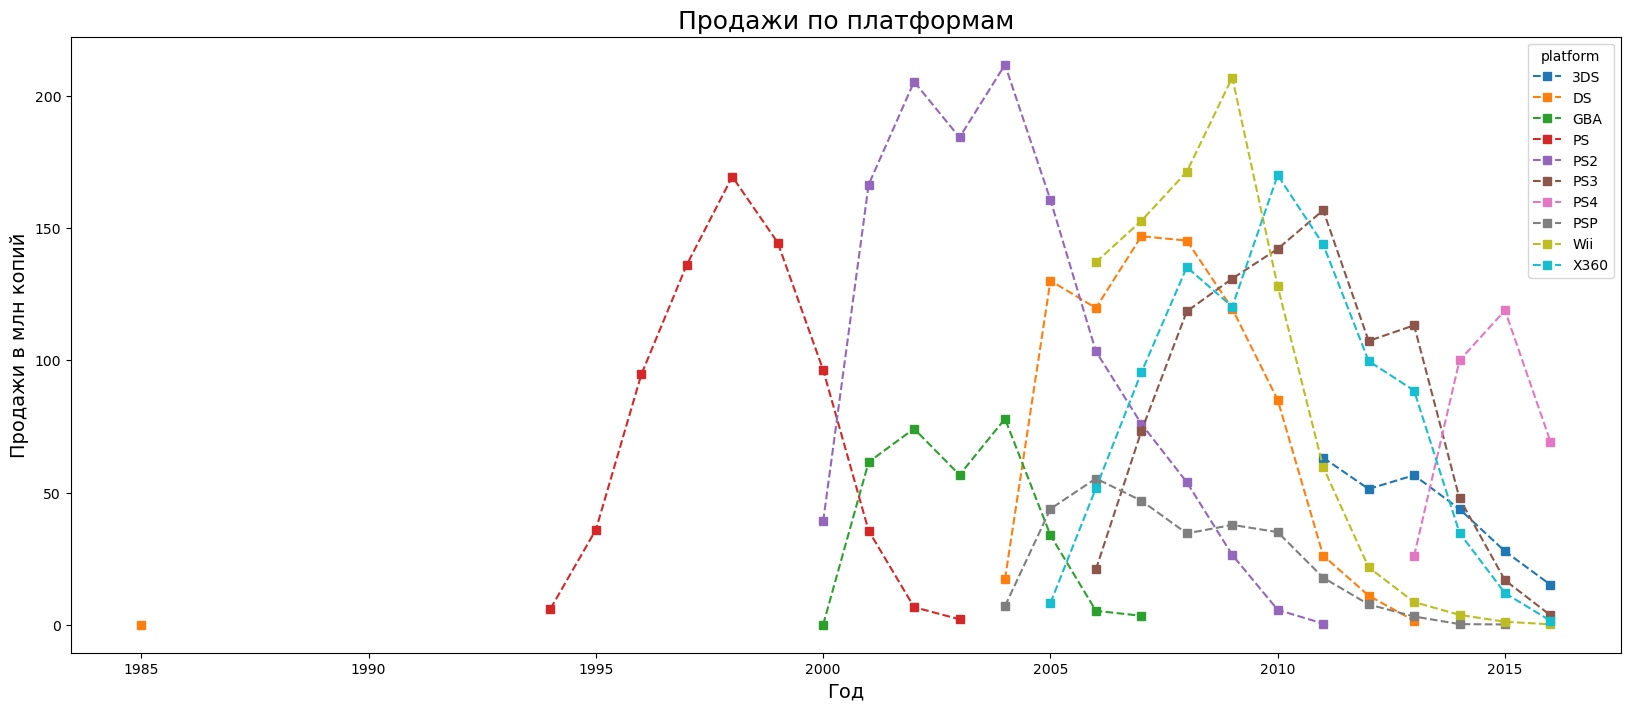

In [36]:
# построим график
top_sales.plot(figsize=(20,8), ls = '--', marker = 's')
plt.title('Продажи по платформам', fontsize=18)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Продажи в млн копий', fontsize=14)
plt.show()

По графику видно, что каждая платформа живет примерно 10 лет. 

##### Продажи по платформам за актуальный период.
Для того, чтобы построить прогноз на 2017 год, нужно взять данные за актуальный период. Рынок игр достаточно сильно меняется, возьмем период в половину времени жизни платформы. Этих данных долно быть достаточно, чтобы поймать тенденцию.

In [37]:
data_new = data[data['year_of_release']>2011]

Чтобы определить потенциально прибыльные платформы, построим график

In [38]:
sales_data_new = data_new.pivot_table(index='year_of_release', columns='platform', \
                           values='total_sales', aggfunc='sum')

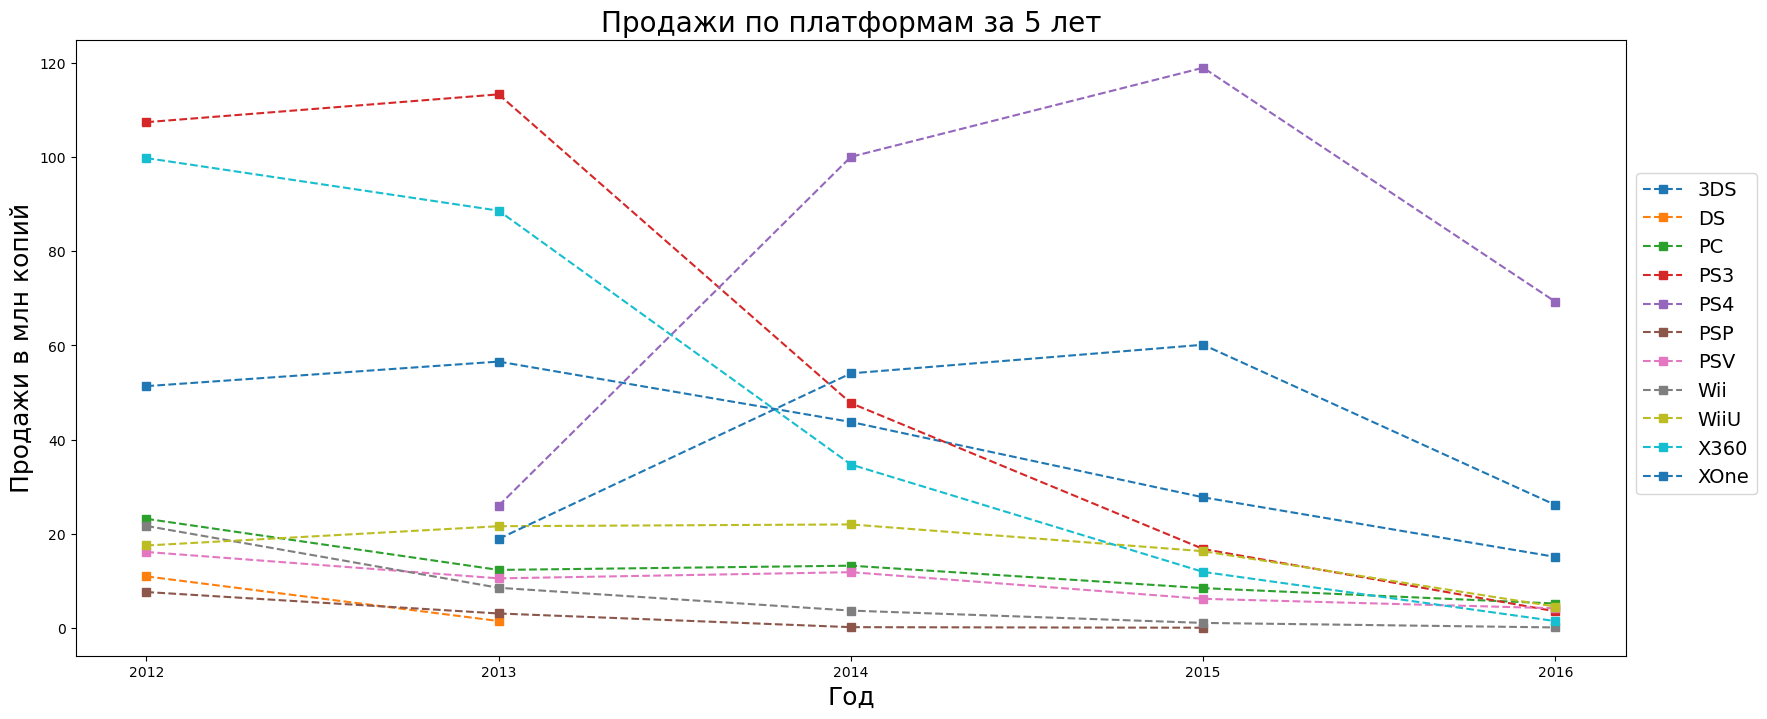

In [39]:
sales_data_new.plot(figsize=(20,8), ls = '--', marker = 's')
plt.title('Продажи по платформам за 5 лет', fontsize=20)
plt.xlabel('Год', fontsize=18)
plt.ylabel('Продажи в млн копий', fontsize=18)
plt.legend(bbox_to_anchor=(1, 0.8), fontsize=14)
plt.locator_params(axis='x', nbins= 5 )
plt.show()

По продажам лидируют PS4 и XOne. На графике видно, что их продажи в 2016 году меньше чем в 2017, это может быть связано с тем, что данные за 2016 год не полные. Так что, скорее всего, продажи игр на эти две платформы растут. 

3DS можно тоже отнести к прибыльным платформам. Ее продажи падают, но не так сильно как у остальных. В 2015 году было продано примерно 30 млн копий игр.

Остальные платформы на 2015 и 2016 года уже потеряли свою популярность, и игр на них продано не больше 20 млн копий по всему миру.

##### Диаграмма размаха по глобальным продажам
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Возьмем три потенциально прибыльных платформы: PS4, XOne и 3DS

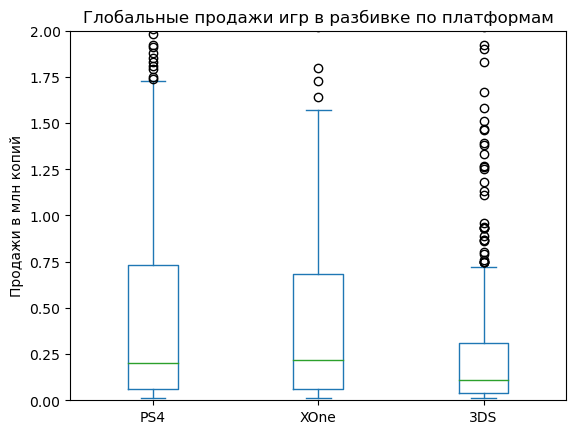

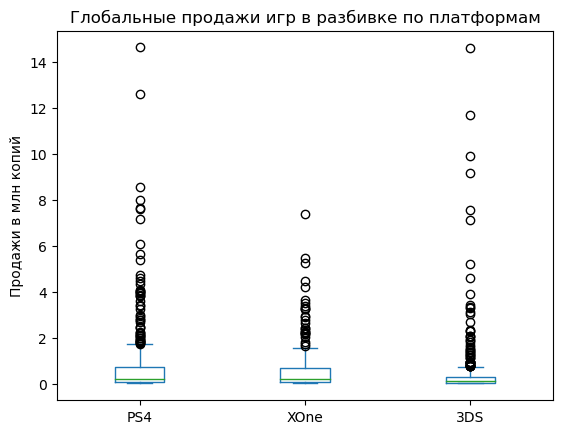

In [40]:
ps4 = data_new[data_new['platform']=='PS4']['total_sales']
x_one = data_new[data_new['platform']=='XOne']['total_sales']
ds3 = data_new[data_new['platform']=='3DS']['total_sales']
df = pd.DataFrame({'PS4': ps4, 'XOne': x_one, '3DS': ds3})

ax = df[['PS4', 'XOne','3DS']].plot(kind='box', title='boxplot', ylim=(0,2))
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.ylabel('Продажи в млн копий')

ax1 = df[['PS4', 'XOne','3DS']].plot(kind='box', title='boxplot')
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.ylabel('Продажи в млн копий')

plt.show()


Медианное значение продаж у всех трех платформ примерно одинаково и равно 0.2 млн проданных копий. У PS4 b 3DS есть игры, которые были проданы более 10 млн раз. У XOne максимум продаж примерно 8 млн. У 3DS больше игр, которые продавались меньше 0.5 млн раз, чем у других двух платформ. Это хорошо видно по третьему квартилю.

##### Зависимость продаж от оценок
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Анализировать будем платформу PS4.

In [41]:
data_ps4 = data_new.loc[data_new['platform']=='PS4']

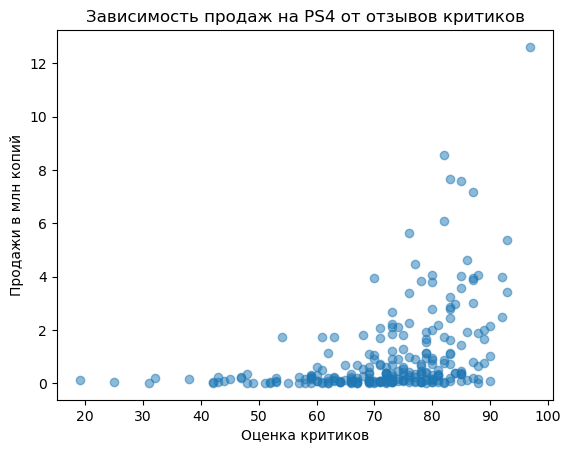

Корреляция продаж от отзывов критиков равна 0.407


In [42]:
plt.scatter(x=data_ps4['critic_score'], y=data_ps4['total_sales'], alpha=0.5)
plt.title('Зависимость продаж на PS4 от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи в млн копий')
plt.show()
print('Корреляция продаж от отзывов критиков равна', round(data_ps4['total_sales'].corr(data_ps4['critic_score']),3))

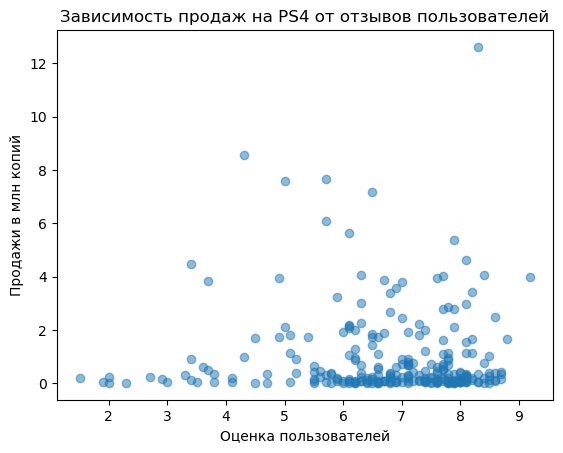

Корреляция продаж от отзывов пользователей равна -0.032


In [43]:
plt.scatter(x=data_ps4['user_score'], y=data_ps4['total_sales'], alpha=0.5)
plt.title('Зависимость продаж на PS4 от отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи в млн копий')
plt.show()
print('Корреляция продаж от отзывов пользователей равна', round(data_ps4['total_sales'].corr(data_ps4['user_score']),3))

Продажи имеют корреляцию с оценками критоков равную 0.4 и с оценками пользователей равную -0.3. Корреляция небольшая и свидетельствует о том, что продажи линейно независимы от оценок. Можно лишь сказать, что игры, у которых высокие оценки критиков, продаются лучше.

Построим такие же графики для платформ XOne и 3DS, чтобы сравнить резульнаты.

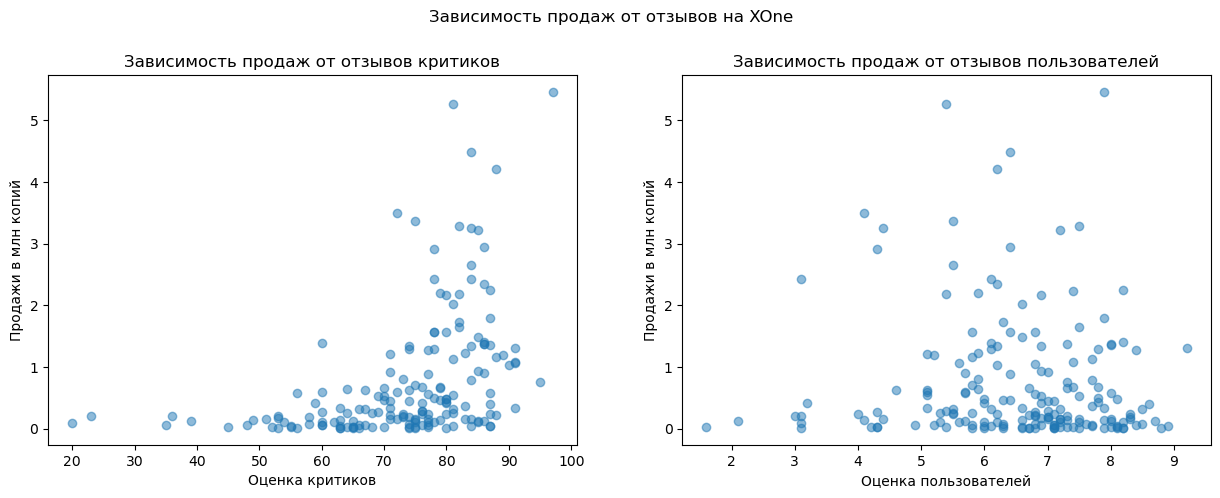

Корреляция продаж от отзывов критиков равна 0.417
Корреляция продаж от отзывов пользователей равна -0.069


In [44]:
data_xone = data_new.loc[data_new['platform']=='XOne']

fig, axs = plt.subplots(nrows= 1 , ncols= 2 )
fig.set_size_inches(15, 5)

axs[0].scatter(x=data_xone['critic_score'], y=data_xone['total_sales'], alpha=0.5)
axs[0].set_title('Зависимость продаж от отзывов критиков')
axs[0].set_xlabel('Оценка критиков')
axs[0].set_ylabel('Продажи в млн копий')

axs[1].scatter(x=data_xone['user_score'], y=data_xone['total_sales'], alpha=0.5)
axs[1].set_title('Зависимость продаж от отзывов пользователей')
axs[1].set_xlabel('Оценка пользователей')
axs[1].set_ylabel('Продажи в млн копий')

fig.suptitle('Зависимость продаж от отзывов на XOne')
plt.subplots_adjust(top= 0.85 )

plt.show()

print('Корреляция продаж от отзывов критиков равна', round(data_xone['total_sales'].corr(data_xone['critic_score']),3))
print('Корреляция продаж от отзывов пользователей равна', round(data_xone['total_sales'].corr(data_xone['user_score']),3))

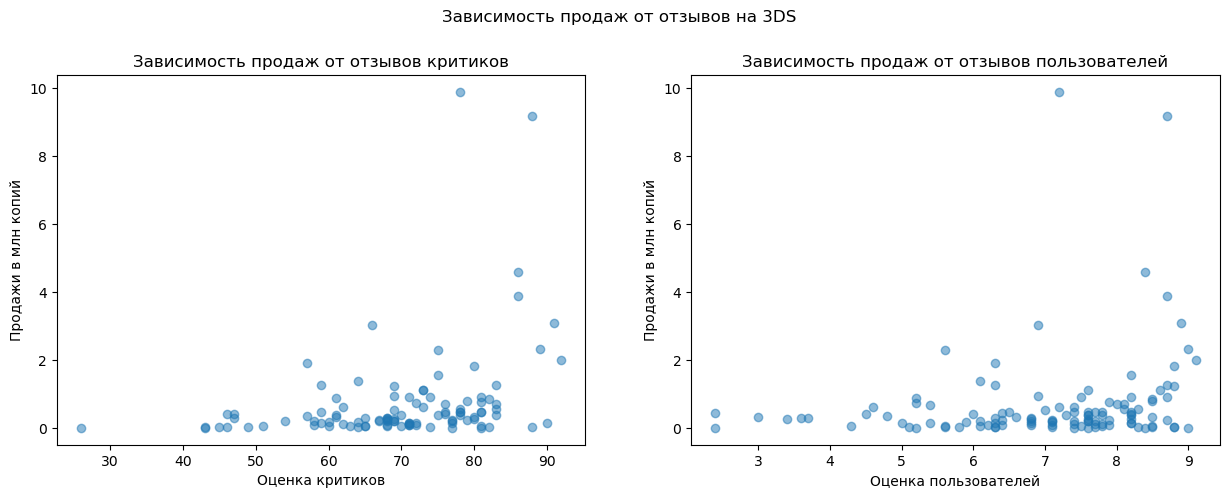

Корреляция продаж от отзывов критиков равна 0.321
Корреляция продаж от отзывов пользователей равна 0.198


In [45]:
data_3ds = data_new.loc[data_new['platform']=='3DS']

fig, axs = plt.subplots(nrows= 1 , ncols= 2 )
fig.set_size_inches(15, 5)

axs[0].scatter(x=data_3ds['critic_score'], y=data_3ds['total_sales'], alpha=0.5)
axs[0].set_title('Зависимость продаж от отзывов критиков')
axs[0].set_xlabel('Оценка критиков')
axs[0].set_ylabel('Продажи в млн копий')

axs[1].scatter(x=data_3ds['user_score'], y=data_3ds['total_sales'], alpha=0.5)
axs[1].set_title('Зависимость продаж от отзывов пользователей')
axs[1].set_xlabel('Оценка пользователей')
axs[1].set_ylabel('Продажи в млн копий')

fig.suptitle('Зависимость продаж от отзывов на 3DS')
plt.subplots_adjust(top= 0.85 )

plt.show()

print('Корреляция продаж от отзывов критиков равна', round(data_3ds['total_sales'].corr(data_3ds['critic_score']),3))
print('Корреляция продаж от отзывов пользователей равна', round(data_3ds['total_sales'].corr(data_3ds['user_score']),3))

Корреляция продаж от оценок на XOne и 3DS почти такая же как и на PS4. К ним справедливы те же выводы. Продажи не имеют сильной линейной зависимости от оценок.

#### Распределение игр по жанрам

Посмотрим на продажи по жанрам

In [46]:
data_genre = data_new.pivot_table(index='genre', values=['total_sales'], aggfunc='median')
data_genre.columns = ['median']
data_genre = data_genre.sort_values(by='median', ascending=False)
data_genre

,median
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


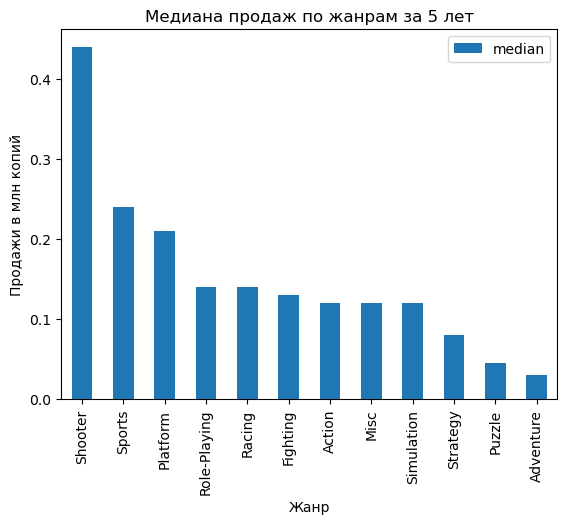

In [47]:
data_genre.plot(y='median',kind='bar')
plt.title('Медиана продаж по жанрам за 5 лет')
plt.xlabel('Жанр')
plt.ylabel('Продажи в млн копий')
plt.show()

Самый прибыльный жанр -  shooter. Такие игры захватывают своей динамикой,соревновательной составляющей  и требуют от игрока определенных умений. Эти игры сильно выделяются по продажам от остальных, так как имеют сейчас большую популярность, в основном связанную с киберспортом.

Игры в жанрах sports и platform тоже хорошо продаются, в отличие от игр в жанре adventure. 

#### Вывод

1. Больше всего игр выпускалось после 2000 года.
2. Период жизни платформы примерно 10 лет.
3. За период с 2012 до 2016 год по продажам лидируют PS4 и XOne. Остальные платформы уже потеряли свою популярность, и игр на них продано не больше 20 млн копий по всему миру.
4. Медианное значение продаж PS4, XOne и 3DS примерно одинаково и равно 0.2 млн проданных копий. У PS4 b 3DS есть игры, которые были проданы более 10 млн раз. У XOne максимум продаж примерно 8 млн. У 3DS больше игр, которые продавались меньше 0.5 млн раз, чем у других двух платформ. 
5. Продажи линейно независимы от оценок. Можно лишь сказать, что игры, у которых высокие оценки критиков, продаются лучше.
6. Самый прибыльный жанр -  shooter. Игры в жанрах sports и platform тоже хорошо продаются, в отличие от игр в жанре adventure. 

### Портрет пользователя каждого региона

#### Популярность платформ
Определим самые популярные платформы во всех регионах.

In [48]:
def pl(col):
    top5 = data_new.groupby(['platform']).agg({col: 'sum', 'total_sales':'sum'}).sort_values(by=col, ascending = False)[:5]
    top5['share'] = round(top5[col] / top5['total_sales'], 2)
    del top5['total_sales']
    return top5

In [49]:
col = ['na_sales', 'eu_sales', 'jp_sales']

for c in col:
    display(pl(c))

,na_sales,share
platform,,
X360,140.05,0.59
PS4,108.74,0.35
PS3,103.38,0.36
XOne,93.12,0.58
3DS,55.31,0.28


,eu_sales,share
platform,,
PS4,141.09,0.45
PS3,106.85,0.37
X360,74.52,0.32
XOne,51.59,0.32
3DS,42.64,0.22


,jp_sales,share
platform,,
3DS,87.79,0.45
PS3,35.29,0.12
PSV,21.04,0.43
PS4,15.96,0.05
WiiU,13.01,0.16


**Вывод**

Игры на платформы Xbox от американской компании Microsoft, лучше продаются в своей родной стране. Доля продаж игр на Xbox составляет примерно 60% от общих продаж.
Игры на 3DS от японской компании Nintendo, пользуются большей популярностью в Японии. Половина всех игр была продана там.
В европе больше продаются игры на PlayStation. Японская компания Sony, выпускающая эти приставки, ориентирована больлше на западный рынок чем на внутренний, поэтому мы видим, что в Японии игры на PS покупают намного меньше чем в Европе и Амеррике.

#### Популярность жанров

Определим самые популярные жанры в регионах.

In [50]:
def genre(col):
    top5 = data_new.groupby(['genre']).agg({col: 'median'}).sort_values(by=col, ascending = False)[:5]
    return top5

In [51]:
for c in col:
    display(genre(c))

,na_sales
genre,
Shooter,0.20
Platform,0.09
Sports,0.08
Fighting,0.05
Racing,0.04


,eu_sales
genre,
Shooter,0.17
Racing,0.09
Platform,0.08
Sports,0.05
Simulation,0.03


,jp_sales
genre,
Role-Playing,0.06
Fighting,0.03
Misc,0.02
Action,0.01
Adventure,0.01


**Вывод**

Популярность жанров в Северной Америке и Европе очень схожа и сильно отличается от японской. Это связано с тем, что в Японии оторвана от запада, у людей другой менталитет и другие вкусы. В Японии создается больше Role-Playing игр и их больше покупают.

#### Влияние рейтинга ESRB на продажи 

Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе.

В наших данных 4 вида рейтинга:
- Е - «Для всех»
- Е10+ - «Для всех от 10 лет и старше»
- М - «Для взрослых»
- Т -  «Подросткам»

In [52]:
def rating(col):
    rat = data_new.groupby(['rating']).agg({col: 'mean'}).sort_values(by=col, ascending = False).reset_index()
    
    return rat

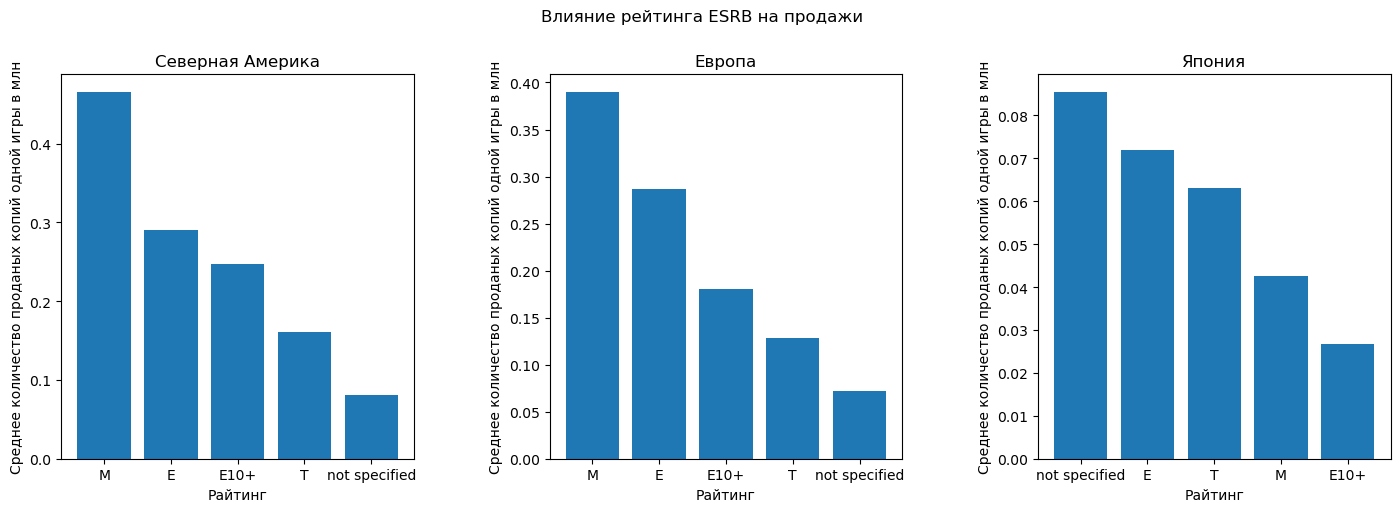

In [53]:
fig, axs = plt.subplots(nrows= 1 , ncols= 3 )
fig. tight_layout ()
fig.set_size_inches(15, 5)

hist_na = rating('na_sales')
axs[0].bar(hist_na['rating'],hist_na['na_sales'])
axs[0].set_title('Северная Америка')

hist_eu = rating('eu_sales')
axs[1].bar(hist_eu['rating'],hist_eu['eu_sales'])
axs[1].set_title('Европа')

hist_jp = rating('jp_sales')
axs[2].bar(hist_jp['rating'],hist_jp['jp_sales'])
axs[2].set_title('Япония')

for i in range(3):
    axs[i].set_xlabel('Райтинг')
    axs[i].set_ylabel('Среднее количество проданых копий одной игры в млн')
    
fig.suptitle('Влияние рейтинга ESRB на продажи')
plt.subplots_adjust(top= 0.85 )
plt.show()

**Вывод**

Нельзя точно сказать влияет ли рейтинг ESRB на продажи, но по графикам видно, что в Америке и Европе игры с рейтингом М покупают намного чаще остальных. У многих японских игр нет рейтинга от американского рейтингового агенства ESRB, поэтому в Японии больше всего покупают игры, где рейтинг не указан. Игры с рейтингом E покупают во всех регионах достаточно хорошо.

### Проверка гипотез

#### Первая гипотеза

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC разные

Это двусторонная гипотеза. Будем проверять ее с помощью метода `scipy.stats.ttest_ind`.
У нас достаточно большие выборки, поэтому лучше взять маленький уровень значимости. Возьмем `alpha` 0.01

In [54]:
xone = data_new.loc[(data_new['platform'] == 'XOne')&(data_new['user_score']), 'user_score']
pc = data_new.loc[(data_new['platform'] == 'PC')&(data_new['user_score']), 'user_score']
alpha = 0.01 

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Мы не можем сказать точно, но средние пользовательские рейтинги платформ Xbox One и PC скорее будут одинаковыми, чем будут отличаться.

#### Вторая гипотеза

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports разные.

Мы сформулировали нулевую и альтернативную гипотезу именно так, потому что нулевая гипотеза всегда предполагает использование знака равенства. Это нужно для верного интерпретирования p-value.
Это двусторонная гипотеза. Будем проверять ее с помощью метода `scipy.stats.ttest_ind`.

In [55]:
act = data_new.loc[(data_new['genre'] == 'Action')&(data_new['user_score']), 'user_score']
sp = data_new.loc[(data_new['genre'] == 'Sports')&(data_new['user_score']), 'user_score']
alpha = 0.01 

results = st.ttest_ind(act, sp, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 5.989458066467418e-20
Отвергаем нулевую гипотезу


**Вывод:**

Скорее всего, средние пользовательские рейтинги жанров Action и Sports разные. 

### Общий вывод

Мы проанализировали данные и сделали следующие выводы:

1. Больше всего игр выпускалось после 2000 года.
2. Период жизни платформы примерно 10 лет.
3. За период с 2012 до 2016 год по продажам лидируют PS4 и XOne. 
4. Медианное значение продаж PS4, XOne и 3DS примерно одинаково и равно 0.2 млн проданных копий. У PS4 b 3DS есть игры, которые были проданы более 10 млн раз. У XOne максимум продаж примерно 8 млн. У 3DS больше игр, которые продавались меньше 0.5 млн раз, чем у других двух платформ.
5. Продажи линейно независимы от оценок. Можно лишь сказать, что игры, у которых высокие оценки критиков, продаются лучше.
6. Самый прибыльный жанр - shooter. Игры в жанрах sports и platform тоже хорошо продаются, в отличие от игр в жанре adventure.
7. В Северной Америке и Европе лучше всего продаются игры на Xbox и PlayStation. Доля продаж XOne и X360 в Америке составляет примерно 60% от всех продаж. В Европе PS4 - 45%. В Японии большую популярность имеет платформа 3DS. Продажи игр на нее составляю 45% от всех продаж.
8. В Северной Америке и Европе большую популярность имеет жанр Shooter. В Японии самый популярный - Role-Playing.
9. В Америке и Европе игры с рейтингом М покупают намного чаще остальных. У многих японских игр нет рейтинга от американского рейтингового агенства ESRB, поэтому в Японии больше всего покупают игры, где рейтинг не указан. Игры с рейтингом E покупают во всех регионах достаточно хорошо.
10. Средние пользовательские рейтинги платформ Xbox One и PC скорее будут одинаковыми, чем будут отличаться.
11. Скорее всего, средние пользовательские рейтинги жанров Action и Sports разные. 

С помощью этих выводов можно выявить определяющие успешность игры закономерности и распланировать компанию на следующий год. Посмотрим что принесет больше продаж в различных регионах.
1. Северная Америка:
    - Игры на X360 и XOne
    - Игры в жанре Shooter
    - Игры с рейтингом M
2. Европа:
    - Игры на PS4 и PS3
    - Игры в жанре Shooter
    - Игры с рейтингом M
3. Япония:
    - Игры на 3DS
    - Игры в жанре Role-Playing
    - Популярные игры в этой стране обычно не имеют рейтинга ESRB
    
Продажи игр не зависят от оценок критиков/пользователей.